In [2]:
#firstly we must import all dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn import metrics

In [5]:
#data collection and processig
car_dataset = pd.read_csv("/Users/walidtaraki/Downloads/archive/car data.csv")
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#dataset number of colomns and rows
car_dataset.shape

(301, 9)

In [7]:
#information about the dataset.
car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [8]:
#missing values in dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [18]:
#encoding Fuel_type Column
car_dataset.replace({"Fuel_Type" :{"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace = True)
#encoding Seller_Type Column
car_dataset.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}}, inplace = True)
#encoding Transmission Column
car_dataset.replace({"Transmission": {"Manual": 0, "Automatic": 1}}, inplace = True)

In [19]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [23]:
#Spliting data into training data and test data
x = car_dataset.drop(["Car_Name", "Selling_Price"], axis = 1)
y = car_dataset["Selling_Price"]
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [24]:
#spliting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

### Linear Training

In [25]:
#loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [54]:
#Model evalution
training_data_prediction = lin_reg_model.predict(X_train)

In [55]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8799451660493705


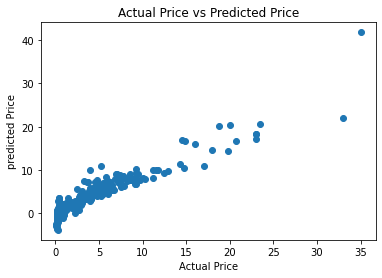

In [52]:
plt.scatter(Y_train, tarining_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [56]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [58]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.836576671502687


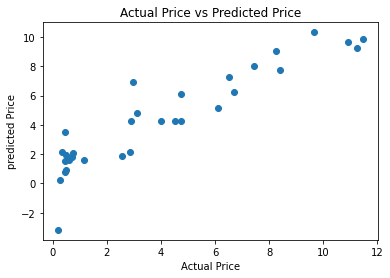

In [61]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

### Lasso Regression

In [64]:
#1st linear regression
lass_reg_model = Lasso()

In [66]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [68]:
#Model evalution
training_data_prediction = lass_reg_model.predict(X_train)

In [69]:
#R Square Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square Error: ", error_score)

R square Error:  0.8427856123435794


In [70]:
#Visualize the actual prices and predicted prices

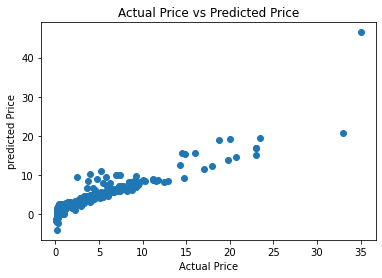

In [73]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [75]:
#Prediction on training data
test_data_prediction = lass_reg_model.predict(X_test)



In [77]:
#R Square Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square Error: ", error_score)

R square Error:  0.8709167941173195


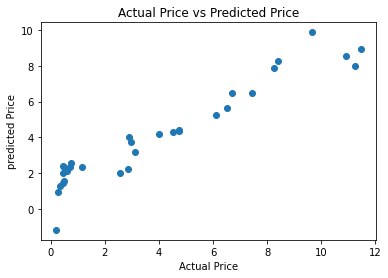

In [79]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()